In [1]:
import quandl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [5]:
aapl = quandl.get('WIKI/AAPL.11',start_date= start, end_date=end)

In [6]:
csco = quandl.get('WIKI/CSCO.11',start_date= start, end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date= start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date= start, end_date=end)

In [9]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [10]:
for stock in (aapl,csco,ibm,amzn):
    stock['Normed Return'] = stock['Adj. Close']/ stock.iloc[0]['Adj. Close']

In [11]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [12]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [13]:
#30% in apple ,20% in cisco , 40% in amazon and 10% in ibm

In [14]:
for stock , allo in zip((aapl,csco,ibm,amzn),[.3,.2,.4,.1]):
    stock['Allocation'] = stock['Normed Return']*allo

In [15]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [16]:
aapl.tail()

,Adj. Close,Normed Return,Allocation
Date,,,
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610
2016-12-29,115.288214,2.181473,0.654442
2016-12-30,114.389454,2.164467,0.649340


In [19]:
for stock in (aapl,csco,ibm,amzn):
    stock['Position Value'] = stock['Allocation']*1000000

In [20]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Value
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [25]:
all_pos_vals = [aapl['Position Value'], csco['Position Value'],
               ibm['Position Value'], amzn['Position Value']]
portfolio_val = pd.concat(all_pos_vals, axis = 1)

In [26]:
portfolio_val.head()

,Position Value,Position Value,Position Value,Position Value
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [27]:
portfolio_val.columns = ['AAPL Position', 'CISCO position', 'IBM Position', 'AMZN Position']

In [28]:
portfolio_val

,AAPL Position,CISCO position,IBM Position,AMZN Position
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166
2012-01-10,308761.520317,202147.074611,389286.097692,100173.155337
2012-01-11,308258.152372,204723.564144,391454.643049,99927.386472
2012-01-12,307411.910610,205582.393988,387654.320988,98268.446629
2012-01-13,306259.270968,204616.210413,384669.887279,99659.274982


In [29]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [30]:
portfolio_val.head()

,AAPL Position,CISCO position,IBM Position,AMZN Position,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [31]:
portfolio_val.tail()

,AAPL Position,CISCO position,IBM Position,AMZN Position,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


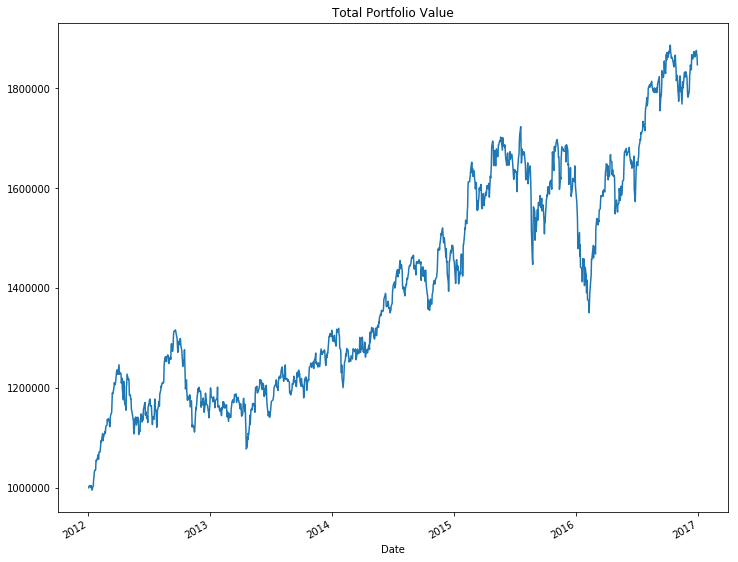

In [32]:
portfolio_val['Total Pos'].plot(figsize=(12,10))
plt.title('Total Portfolio Value');

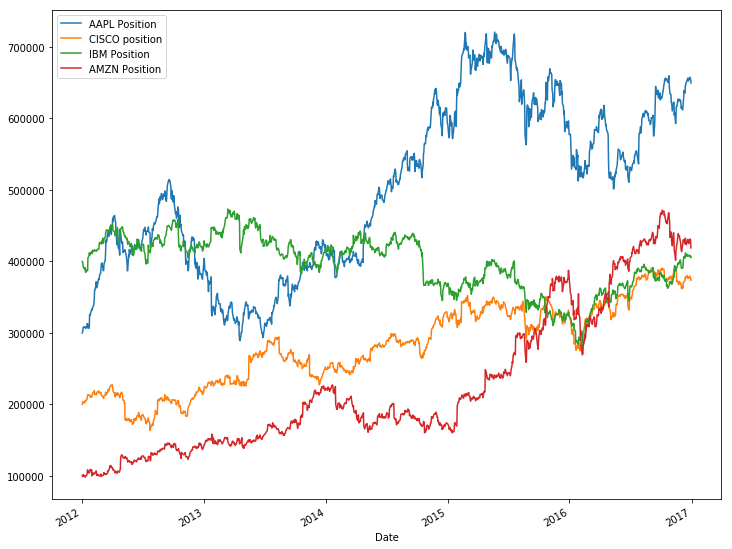

In [33]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(12,10))
